In [1]:
pwd

'C:\\Users\\GL63\\Desktop'

In [2]:
#Basic libraries
import pandas as pd 
import numpy as np 

from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [3]:
raw_reviews = pd.read_csv('combined_csv1.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(22149, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22149 entries, 0 to 22148
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tweet_time  22149 non-null  object 
 1   Id          22149 non-null  float64
 2   user name   22149 non-null  object 
 3   Place       15306 non-null  object 
 4   Text        22149 non-null  object 
dtypes: float64(1), object(4)
memory usage: 865.3+ KB
None


In [4]:
raw_reviews = pd.read_csv('combined_csv.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(19399, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19399 entries, 0 to 19398
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tweet_time     19399 non-null  object 
 1   Id             19399 non-null  float64
 2   Place          12948 non-null  object 
 3   Retweet count  19399 non-null  int64  
 4   Text           19399 non-null  object 
 5   user name      19399 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 909.5+ KB
None


In [5]:
raw_reviews.head()

Tweet_time            Id              Place  Retweet count  \
0  30-04-2021 13:49  1.390000e+18                NaN              0   
1  30-04-2021 13:49  1.390000e+18     Chennai, India            590   
2  30-04-2021 13:49  1.390000e+18                NaN              1   
3  30-04-2021 13:48  1.390000e+18             Kerala              0   
4  30-04-2021 13:48  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  
0  With respectfully , #Pbks management go and fu...  Maxithebigshow  
1  RT @rameshlaus: Apr 16th - 23rd Top #IPL2021 M...  Venkat63544151  
2  RT @DreamerFantasy7: Final High Risk 11 🍸\r\nJ...   SagarSejpal96  
3  RT if You Want a Gayle-Storm Today #PBKS #PBKS...   CricGeekAyush  
4  RT @AyyagaruNumber1: @PunjabKingsIPL If shit h...   Being_pratiks

In [6]:
raw_reviews['Tweet_time'] = pd.to_datetime(raw_reviews.Tweet_time, format='%d-%m-%Y %H:%M')

In [7]:
print (raw_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19399 entries, 0 to 19398
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tweet_time     19399 non-null  datetime64[ns]
 1   Id             19399 non-null  float64       
 2   Place          12948 non-null  object        
 3   Retweet count  19399 non-null  int64         
 4   Text           19399 non-null  object        
 5   user name      19399 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 909.5+ KB
None


In [8]:
raw_reviews.head()

Tweet_time            Id              Place  Retweet count  \
0 2021-04-30 13:49:00  1.390000e+18                NaN              0   
1 2021-04-30 13:49:00  1.390000e+18     Chennai, India            590   
2 2021-04-30 13:49:00  1.390000e+18                NaN              1   
3 2021-04-30 13:48:00  1.390000e+18             Kerala              0   
4 2021-04-30 13:48:00  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  
0  With respectfully , #Pbks management go and fu...  Maxithebigshow  
1  RT @rameshlaus: Apr 16th - 23rd Top #IPL2021 M...  Venkat63544151  
2  RT @DreamerFantasy7: Final High Risk 11 🍸\r\nJ...   SagarSejpal96  
3  RT if You Want a Gayle-Storm Today #PBKS #PBKS...   CricGeekAyush  
4  RT @AyyagaruNumber1: @PunjabKingsIPL If shit h...   Being_pratiks

In [9]:
#Creating a copy
process_reviews=raw_reviews.copy()

#Checking for null values
process_reviews.isnull().sum()

Tweet_time          0
Id                  0
Place            6451
Retweet count       0
Text                0
user name           0
dtype: int64

In [10]:
process_reviews['Place']=process_reviews['Place'].fillna('N.A')

In [11]:

#Checking for null values
process_reviews.isnull().sum()

Tweet_time       0
Id               0
Place            0
Retweet count    0
Text             0
user name        0
dtype: int64

In [12]:
process_reviews.head()

Tweet_time            Id              Place  Retweet count  \
0 2021-04-30 13:49:00  1.390000e+18                N.A              0   
1 2021-04-30 13:49:00  1.390000e+18     Chennai, India            590   
2 2021-04-30 13:49:00  1.390000e+18                N.A              1   
3 2021-04-30 13:48:00  1.390000e+18             Kerala              0   
4 2021-04-30 13:48:00  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  
0  With respectfully , #Pbks management go and fu...  Maxithebigshow  
1  RT @rameshlaus: Apr 16th - 23rd Top #IPL2021 M...  Venkat63544151  
2  RT @DreamerFantasy7: Final High Risk 11 🍸\r\nJ...   SagarSejpal96  
3  RT if You Want a Gayle-Storm Today #PBKS #PBKS...   CricGeekAyush  
4  RT @AyyagaruNumber1: @PunjabKingsIPL If shit h...   Being_pratiks

In [13]:
process_reviews['Tweet_time'].dt.tz_localize('utc').dt.tz_convert('Asia/Kolkata')

0       2021-04-30 19:19:00+05:30
1       2021-04-30 19:19:00+05:30
2       2021-04-30 19:19:00+05:30
3       2021-04-30 19:18:00+05:30
4       2021-04-30 19:18:00+05:30
                   ...           
19394   2021-04-30 23:04:00+05:30
19395   2021-04-30 23:04:00+05:30
19396   2021-04-30 23:04:00+05:30
19397   2021-04-30 23:04:00+05:30
19398   2021-04-30 23:04:00+05:30
Name: Tweet_time, Length: 19399, dtype: datetime64[ns, Asia/Kolkata]

In [14]:
process_reviews.head()

Tweet_time            Id              Place  Retweet count  \
0 2021-04-30 13:49:00  1.390000e+18                N.A              0   
1 2021-04-30 13:49:00  1.390000e+18     Chennai, India            590   
2 2021-04-30 13:49:00  1.390000e+18                N.A              1   
3 2021-04-30 13:48:00  1.390000e+18             Kerala              0   
4 2021-04-30 13:48:00  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  
0  With respectfully , #Pbks management go and fu...  Maxithebigshow  
1  RT @rameshlaus: Apr 16th - 23rd Top #IPL2021 M...  Venkat63544151  
2  RT @DreamerFantasy7: Final High Risk 11 🍸\r\nJ...   SagarSejpal96  
3  RT if You Want a Gayle-Storm Today #PBKS #PBKS...   CricGeekAyush  
4  RT @AyyagaruNumber1: @PunjabKingsIPL If shit h...   Being_pratiks

In [15]:
process_reviews['year'] = process_reviews['Tweet_time'].dt.year
process_reviews['month'] = process_reviews['Tweet_time'].dt.month
process_reviews['day'] = process_reviews['Tweet_time'].dt.day
process_reviews['hour'] = process_reviews['Tweet_time'].dt.hour
process_reviews['minute'] = process_reviews['Tweet_time'].dt.minute


process_reviews.head()

Tweet_time            Id              Place  Retweet count  \
0 2021-04-30 13:49:00  1.390000e+18                N.A              0   
1 2021-04-30 13:49:00  1.390000e+18     Chennai, India            590   
2 2021-04-30 13:49:00  1.390000e+18                N.A              1   
3 2021-04-30 13:48:00  1.390000e+18             Kerala              0   
4 2021-04-30 13:48:00  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  year  \
0  With respectfully , #Pbks management go and fu...  Maxithebigshow  2021   
1  RT @rameshlaus: Apr 16th - 23rd Top #IPL2021 M...  Venkat63544151  2021   
2  RT @DreamerFantasy7: Final High Risk 11 🍸\r\nJ...   SagarSejpal96  2021   
3  RT if You Want a Gayle-Storm Today #PBKS #PBKS...   CricGeekAyush  2021   
4  RT @AyyagaruNumber1: @PunjabKingsIPL If shit h...   Being_pratiks  2021   

   month  day  hour  minute  
0      4   30    13      49  
1      4   30    13      49  
2      4   30    13      49  
3      4   30    13      48  
4      4   30    13      48

In [16]:
#Removing unnecessary columns
process_reviews=process_reviews.drop(['Tweet_time'], axis=1)

In [17]:
process_reviews.head()

Id              Place  Retweet count  \
0  1.390000e+18                N.A              0   
1  1.390000e+18     Chennai, India            590   
2  1.390000e+18                N.A              1   
3  1.390000e+18             Kerala              0   
4  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  year  \
0  With respectfully , #Pbks management go and fu...  Maxithebigshow  2021   
1  RT @rameshlaus: Apr 16th - 23rd Top #IPL2021 M...  Venkat63544151  2021   
2  RT @DreamerFantasy7: Final High Risk 11 🍸\r\nJ...   SagarSejpal96  2021   
3  RT if You Want a Gayle-Storm Today #PBKS #PBKS...   CricGeekAyush  2021   
4  RT @AyyagaruNumber1: @PunjabKingsIPL If shit h...   Being_pratiks  2021   

   month  day  hour  minute  
0      4   30    13      49  
1      4   30    13      49  
2      4   30    13      49  
3      4   30    13      48  
4      4   30    13      48

In [18]:
#Creating a copy 
clean_reviews=process_reviews.copy()
import re
import string

In [19]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [20]:
process_reviews['Text']=process_reviews['Text'].apply(lambda x:review_cleaning(x))
process_reviews.head()

Id              Place  Retweet count  \
0  1.390000e+18                N.A              0   
1  1.390000e+18     Chennai, India            590   
2  1.390000e+18                N.A              1   
3  1.390000e+18             Kerala              0   
4  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  year  \
0  with respectfully  pbks management go and fuck...  Maxithebigshow  2021   
1  rt rameshlaus apr    top  matches tv ratings\r...  Venkat63544151  2021   
2  rt  final high risk  🍸\rjoin telegram for fina...   SagarSejpal96  2021   
3    rt if you want a gaylestorm today pbks pbksvrcb   CricGeekAyush  2021   
4  rt  punjabkingsipl if shit has a team then i w...   Being_pratiks  2021   

   month  day  hour  minute  
0      4   30    13      49  
1      4   30    13      49  
2      4   30    13      49  
3      4   30    13      48  
4      4   30    13      48

In [21]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [22]:
process_reviews['Text'] = process_reviews['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

Id              Place  Retweet count  \
0  1.390000e+18                N.A              0   
1  1.390000e+18     Chennai, India            590   
2  1.390000e+18                N.A              1   
3  1.390000e+18             Kerala              0   
4  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  year  \
0             respectfully pbks management go fuck 🙃  Maxithebigshow  2021   
1  rt rameshlaus apr top matches tv ratings mi vs...  Venkat63544151  2021   
2  rt final high risk 🍸 join telegram final updat...   SagarSejpal96  2021   
3          rt if want gaylestorm today pbks pbksvrcb   CricGeekAyush  2021   
4  rt punjabkingsipl if shit team would pbks team...   Being_pratiks  2021   

   month  day  hour  minute  
0      4   30    13      49  
1      4   30    13      49  
2      4   30    13      49  
3      4   30    13      48  
4      4   30    13      48

In [23]:
process_reviews['polarity_C'] = process_reviews['Text'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['subjectivity'] = process_reviews['Text'].map(lambda text: TextBlob(text).sentiment.subjectivity)
process_reviews['Text_len'] = process_reviews['Text'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['Text'].apply(lambda x: len(str(x).split()))

In [24]:
process_reviews.head()

Id              Place  Retweet count  \
0  1.390000e+18                N.A              0   
1  1.390000e+18     Chennai, India            590   
2  1.390000e+18                N.A              1   
3  1.390000e+18             Kerala              0   
4  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  year  \
0             respectfully pbks management go fuck 🙃  Maxithebigshow  2021   
1  rt rameshlaus apr top matches tv ratings mi vs...  Venkat63544151  2021   
2  rt final high risk 🍸 join telegram final updat...   SagarSejpal96  2021   
3          rt if want gaylestorm today pbks pbksvrcb   CricGeekAyush  2021   
4  rt punjabkingsipl if shit team would pbks team...   Being_pratiks  2021   

   month  day  hour  minute  polarity_C  subjectivity  Text_len  word_count  
0      4   30    13      49    0.050000      0.650000        38           6  
1      4   30    13      49    0.500000      0.500000        83          20  
2      4   30    13      49    0.053333      0.846667        82          14  
3      4   30    13      48    0.000000      0.000000        41           7  
4      4   30    13      48   -0.200000      0.800000        80          15

In [25]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['polarity_C'] == 0.0:
        val = 'Neutral'
    elif row['polarity_C'] < 0.0:
        val = 'Negative'
    elif row['polarity_C'] > 0.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [26]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

Id              Place  Retweet count  \
0  1.390000e+18                N.A              0   
1  1.390000e+18     Chennai, India            590   
2  1.390000e+18                N.A              1   
3  1.390000e+18             Kerala              0   
4  1.390000e+18  Chandrapur, India              1   

                                                Text       user name  year  \
0             respectfully pbks management go fuck 🙃  Maxithebigshow  2021   
1  rt rameshlaus apr top matches tv ratings mi vs...  Venkat63544151  2021   
2  rt final high risk 🍸 join telegram final updat...   SagarSejpal96  2021   
3          rt if want gaylestorm today pbks pbksvrcb   CricGeekAyush  2021   
4  rt punjabkingsipl if shit team would pbks team...   Being_pratiks  2021   

   month  day  hour  minute  polarity_C  subjectivity  Text_len  word_count  \
0      4   30    13      49    0.050000      0.650000        38           6   
1      4   30    13      49    0.500000      0.500000        83          20   
2      4   30    13      49    0.053333      0.846667        82          14   
3      4   30    13      48    0.000000      0.000000        41           7   
4      4   30    13      48   -0.200000      0.800000        80          15   

  sentiment  
0  Positive  
1  Positive  
2  Positive  
3   Neutral  
4  Negative

In [27]:
process_reviews['sentiment'].value_counts()

Neutral     10757
Positive     6670
Negative     1972
Name: sentiment, dtype: int64

In [28]:
pd.DataFrame(process_reviews.groupby('sentiment')['subjectivity'].mean())

subjectivity
sentiment              
Negative       0.538018
Neutral        0.042052
Positive       0.509320

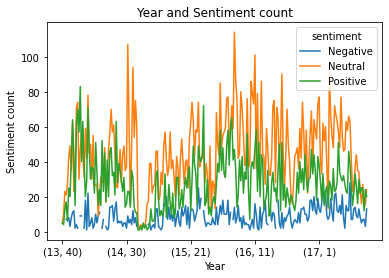

In [29]:
process_reviews.groupby(['hour','minute','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

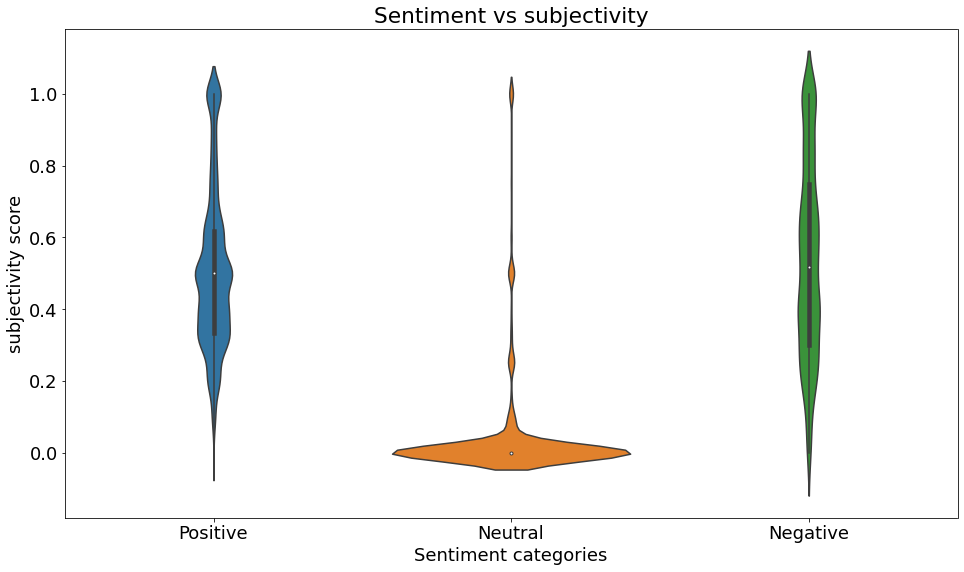

In [30]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment', 'subjectivity'])
#senti_help = senti_help[senti_help['subjectivity'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["subjectivity"])
plt.title('Sentiment vs subjectivity')
plt.xlabel('Sentiment categories')
plt.ylabel('subjectivity score')
plt.show()

In [31]:
#Filtering data
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In [32]:

from collections import defaultdict
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

In [33]:
## Get the bar chart from positive reviews ##
for sent in review_pos["Text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

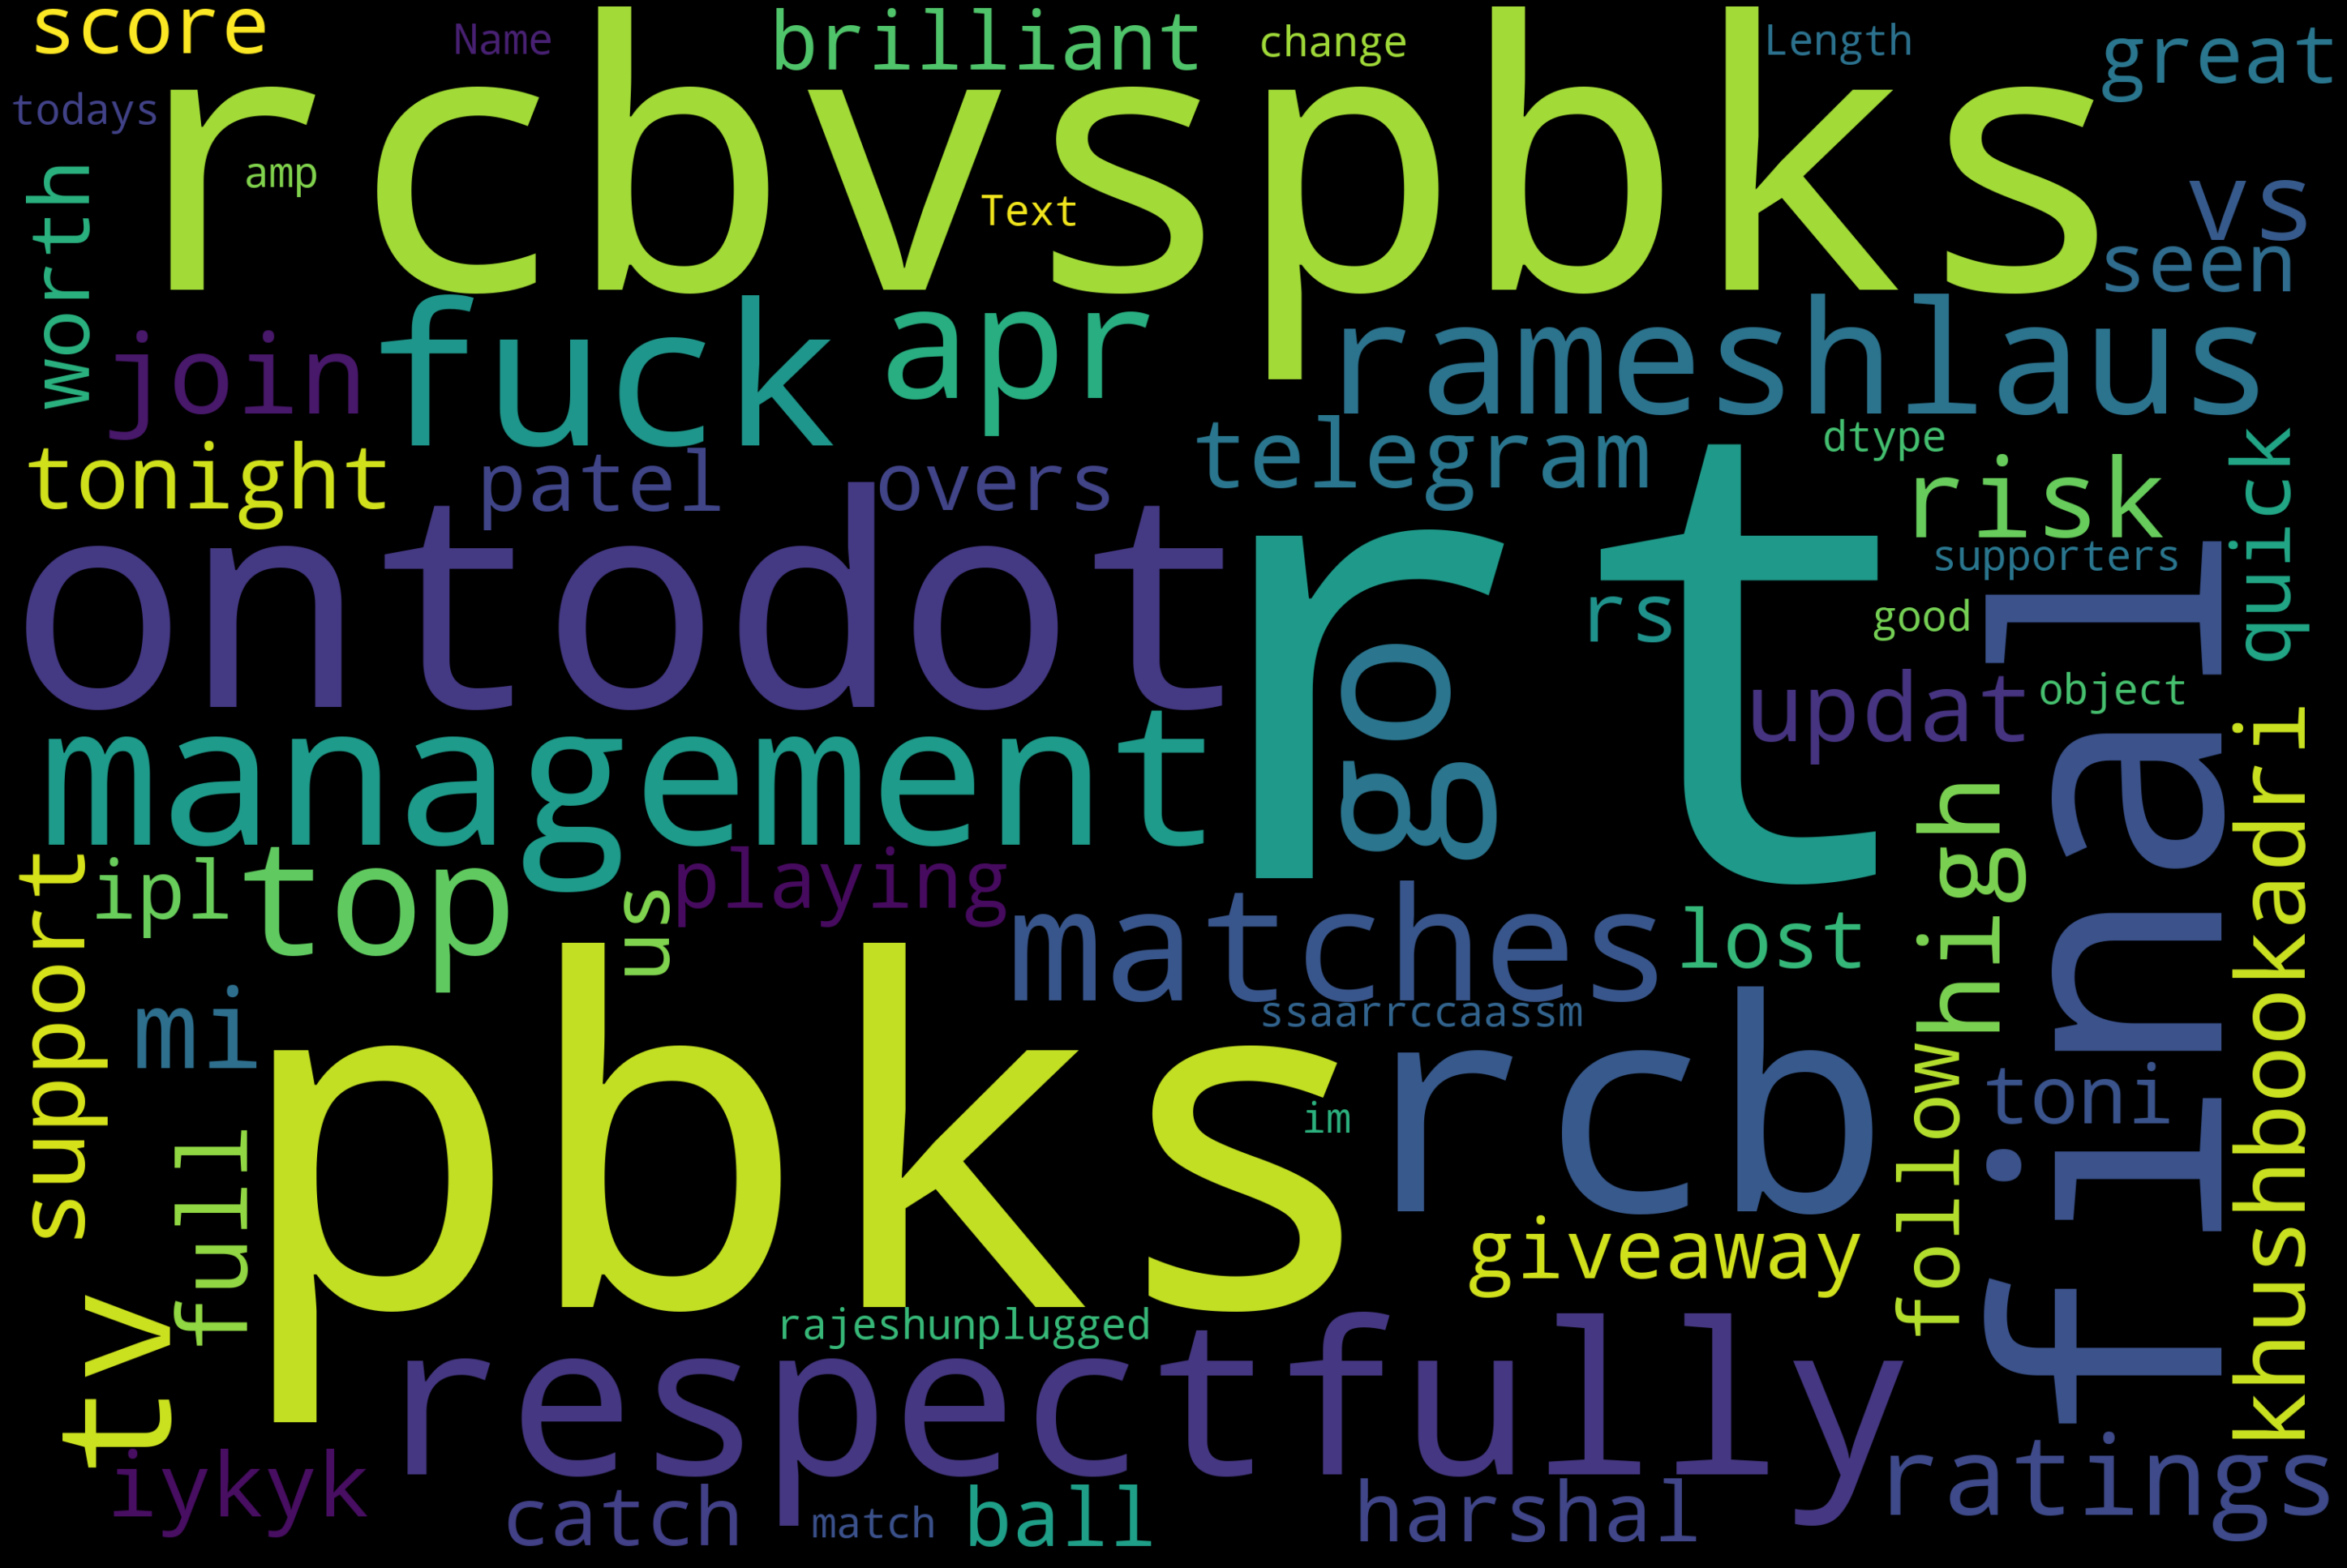

In [34]:
text = review_pos["Text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

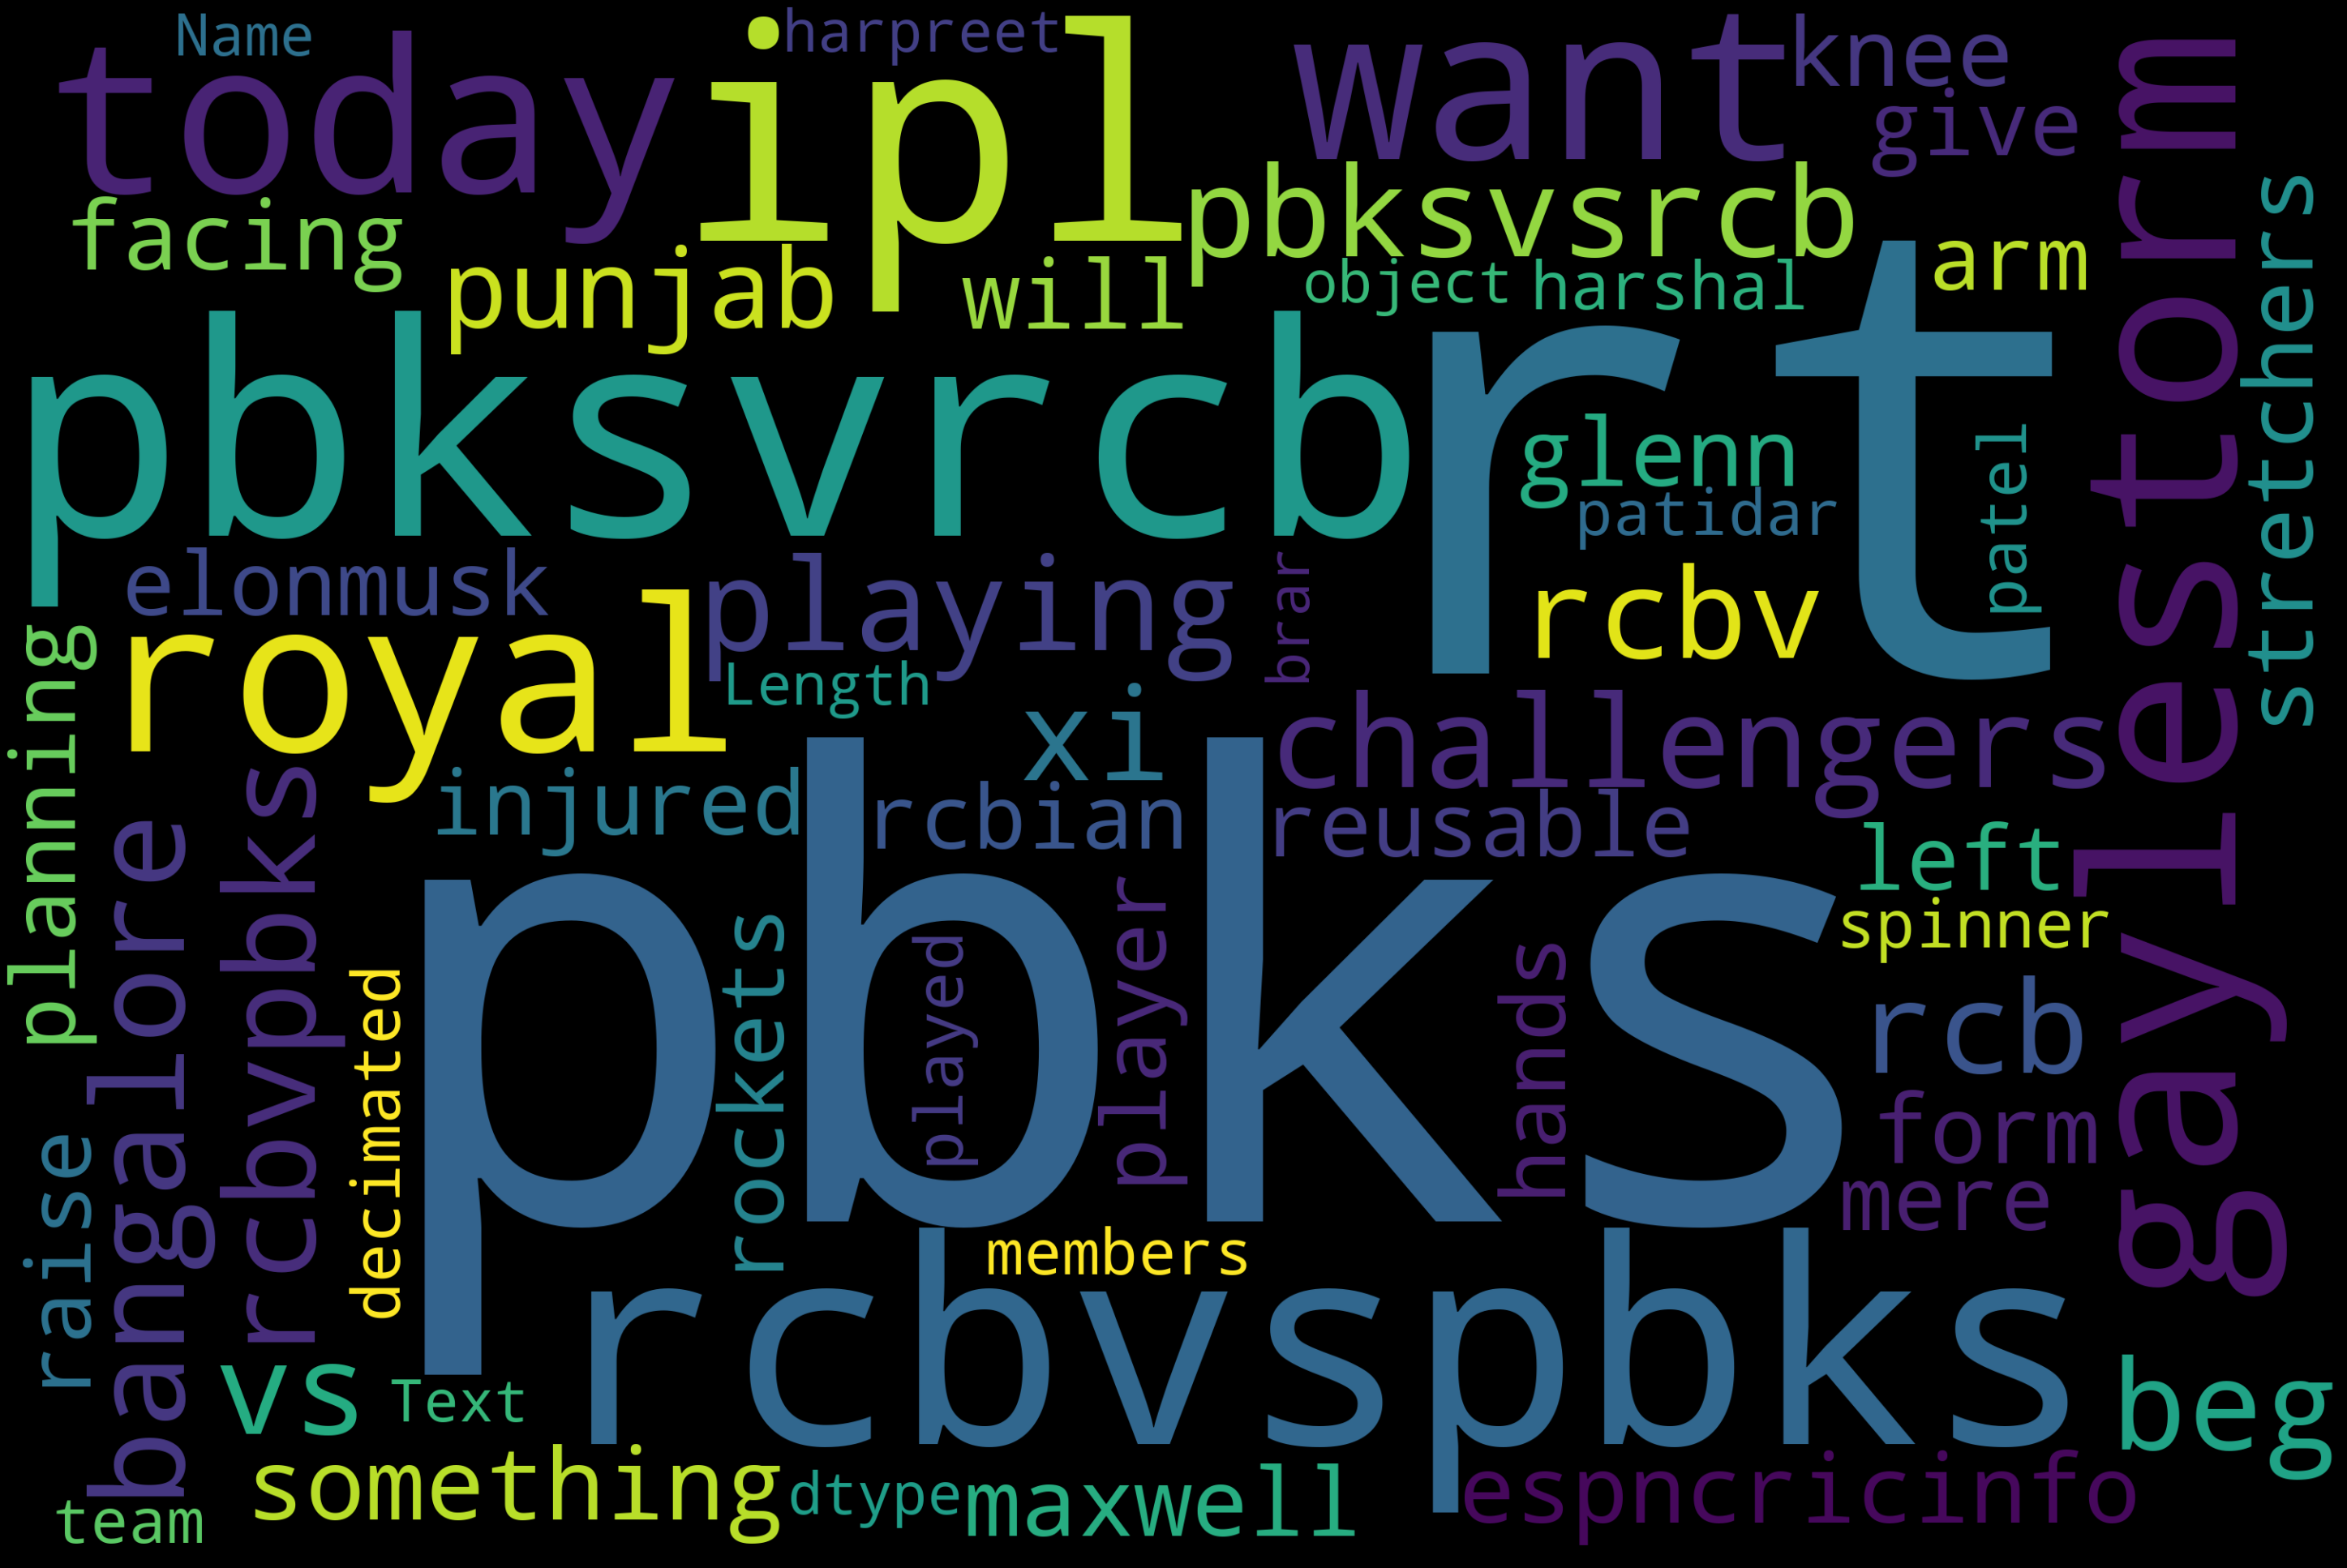

In [35]:
text = review_neu["Text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

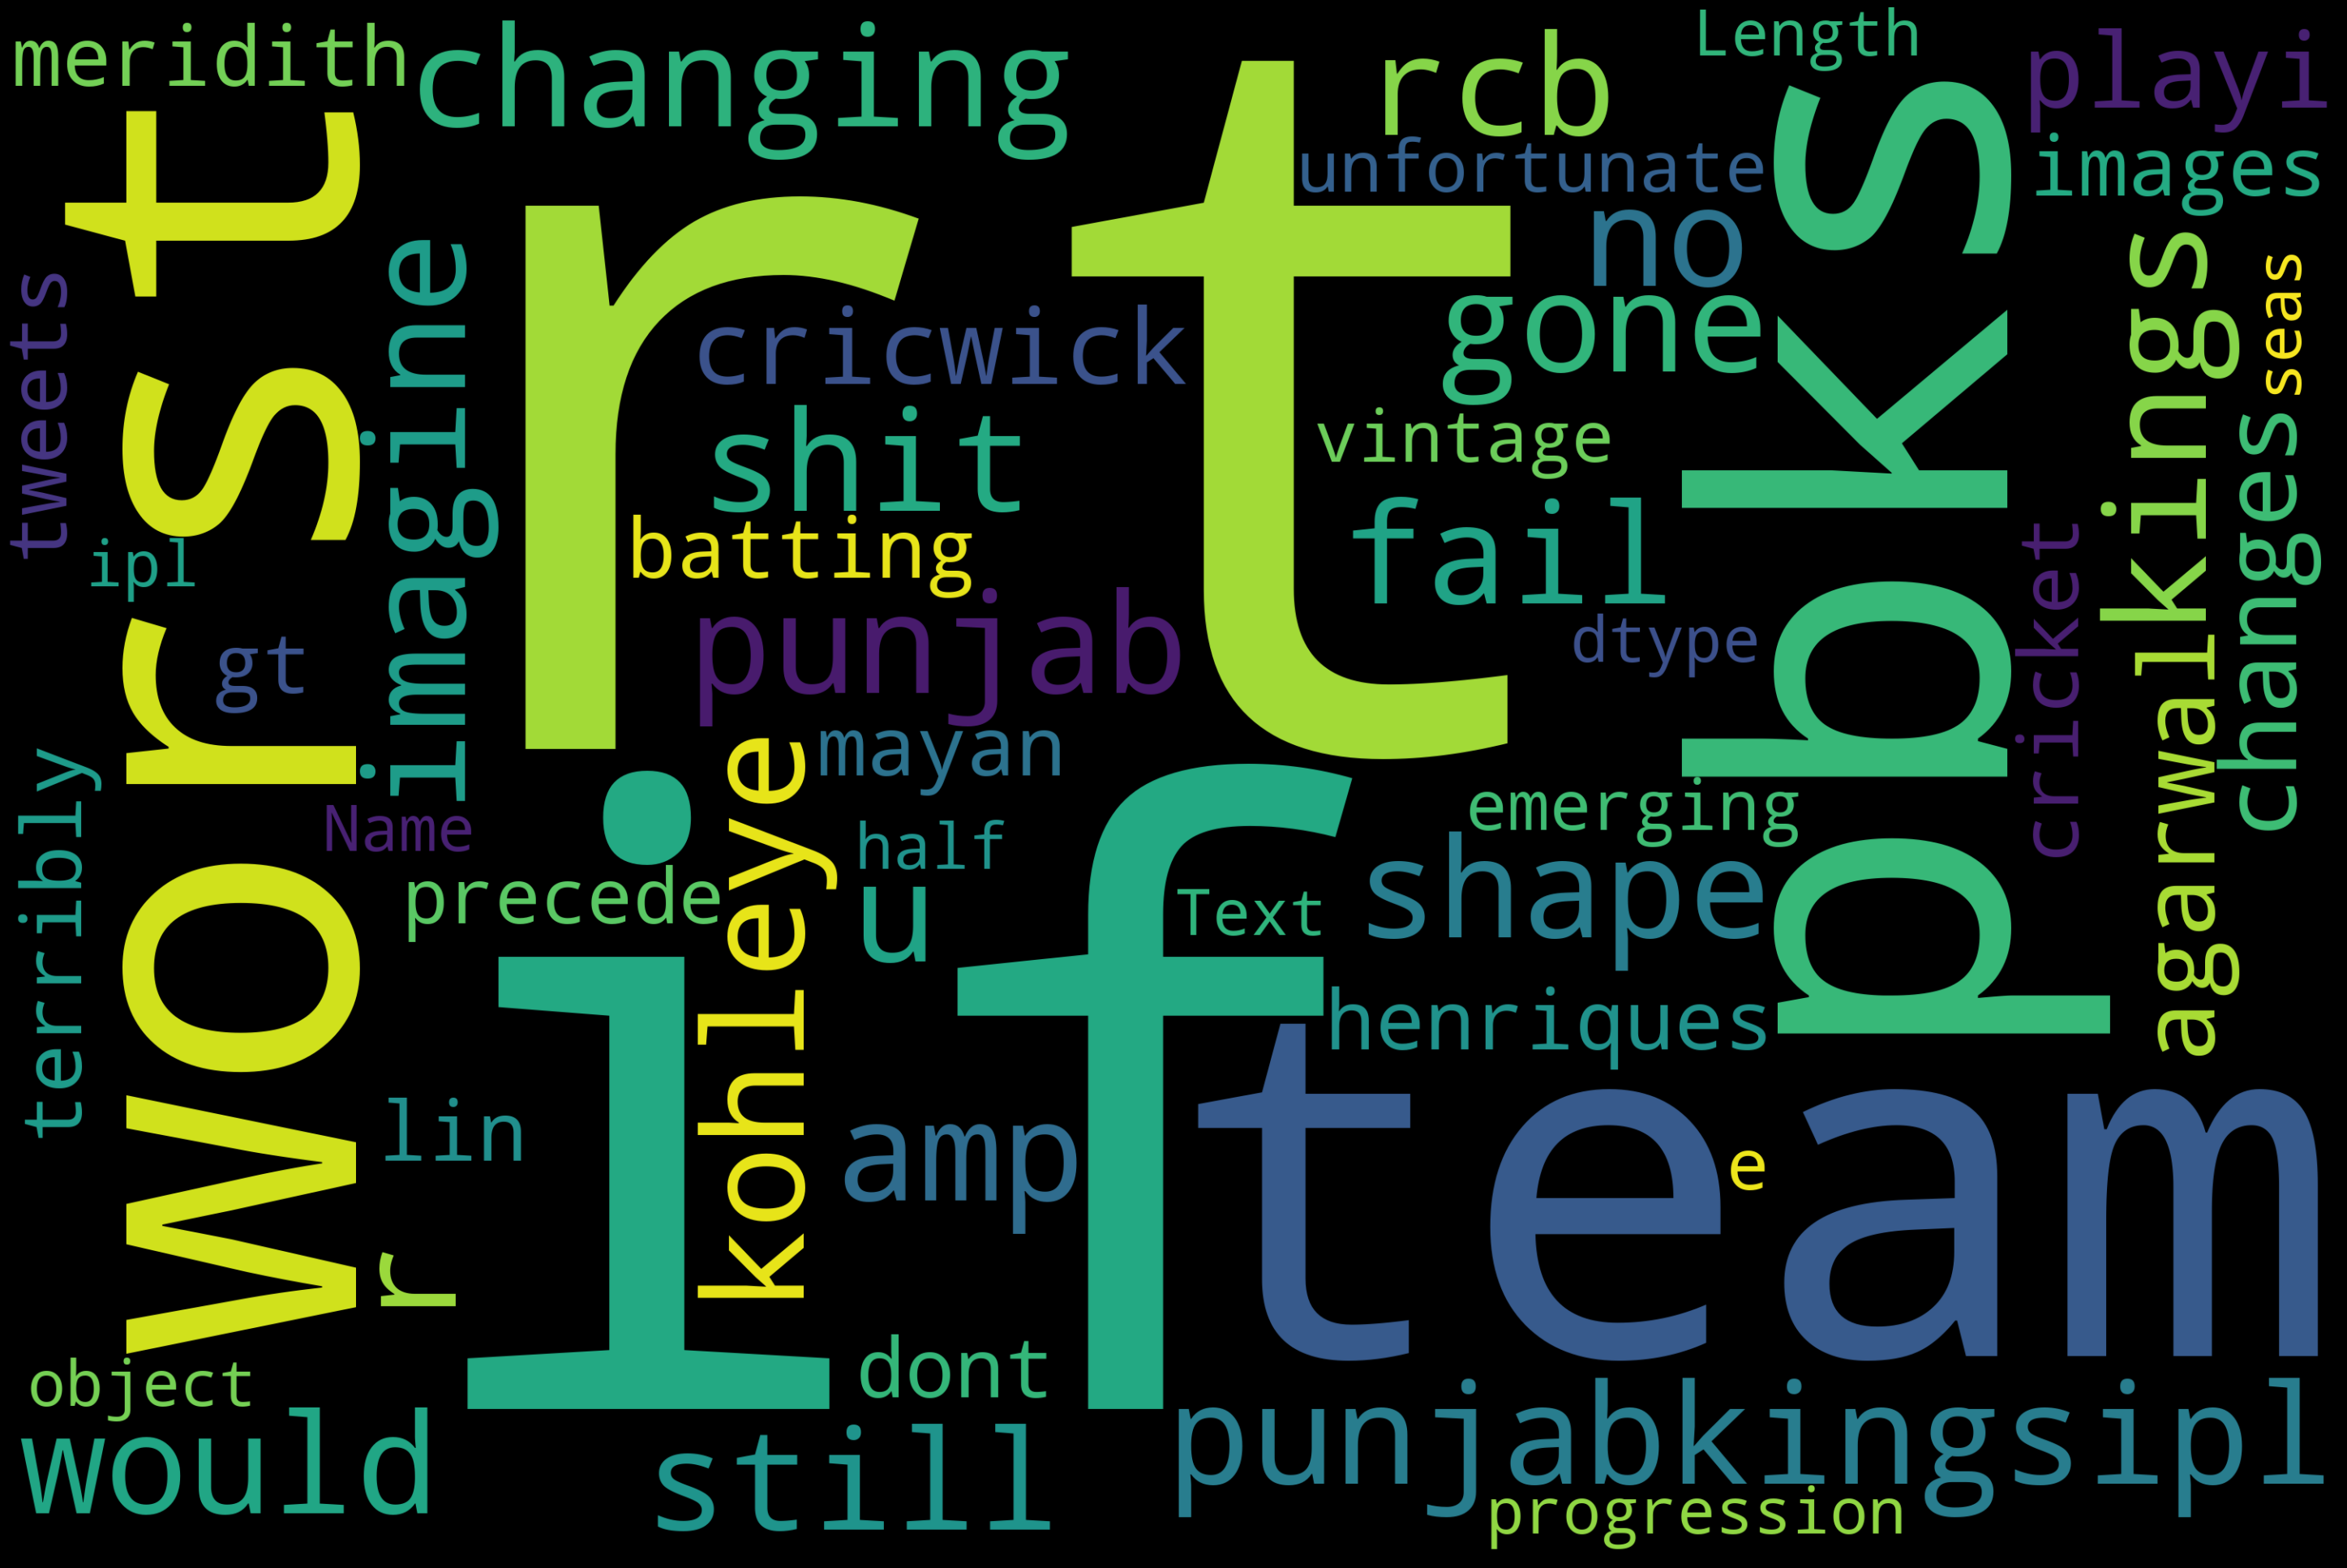

In [36]:
text = review_neg["Text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment']) 
  
process_reviews['sentiment'].unique() 

array([2, 1, 0])

In [38]:
process_reviews['sentiment'].value_counts()

1    10757
2     6670
0     1972
Name: sentiment, dtype: int64

In [39]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['Text']].reset_index(drop=True)
review_features.head()

Text
0             respectfully pbks management go fuck 🙃
1  rt rameshlaus apr top matches tv ratings mi vs...
2  rt final high risk 🍸 join telegram final updat...
3          rt if want gaylestorm today pbks pbksvrcb
4  rt punjabkingsipl if shit team would pbks team...

In [40]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['Text'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)  

In [41]:
corpus[3]

'rt if want gaylestorm today pbk pbksvrcb'

In [42]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['Text'])

In [43]:
X.shape

(19399, 5000)

In [44]:
print(X)

  (0, 1346)	0.52217721453083
  (0, 2148)	0.52217721453083
  (0, 2730)	0.42660622343616916
  (0, 3619)	0.52217721453083
  (1, 4661)	0.22517425658975687
  (1, 3662)	0.22668787387315714
  (1, 4676)	0.22395044784190804
  (1, 3452)	0.19178791653057073
  (1, 1855)	0.2265597884490984
  (1, 4665)	0.2263046995084197
  (1, 788)	0.22542303835416047
  (1, 2690)	0.22668787387315714
  (1, 4669)	0.21296212912069967
  (1, 2324)	0.4526093990168394
  (1, 3288)	0.22668787387315714
  (1, 4523)	0.22668787387315714
  (1, 2229)	0.22668787387315714
  (1, 4468)	0.22668787387315714
  (1, 152)	0.22668787387315714
  (1, 3276)	0.22668787387315714
  (1, 3809)	0.21838995252515386
  (2, 1718)	0.3042894899801325
  (2, 2220)	0.28544978762914885
  (2, 4647)	0.28544978762914885
  (2, 943)	0.28544978762914885
  :	:
  (19394, 157)	0.3324612138309084
  (19394, 1985)	0.3146066706415057
  (19394, 3415)	0.19956964311327519
  (19395, 897)	0.296448602839392
  (19395, 4069)	0.296448602839392
  (19395, 1393)	0.296448602839392
  (1

In [45]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

In [46]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({1: 10757, 2: 6670, 0: 1972})
Resampled dataset shape Counter({2: 10757, 1: 10757, 0: 10757})


In [47]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.800707932136344
Decision Tree Test Accuracy: 0.8076136067587182
KNN Test Accuracy: 0.7529207318045756
SVC Test Accuracy: 0.8178217595423298
Naive Bayes Test Accuracy: 0.743535327488396


In [50]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=159.98587196060572, random_state=0)
The mean accuracy of the model is: 0.9084035696579078


In [51]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


Confusion matrix, without normalization


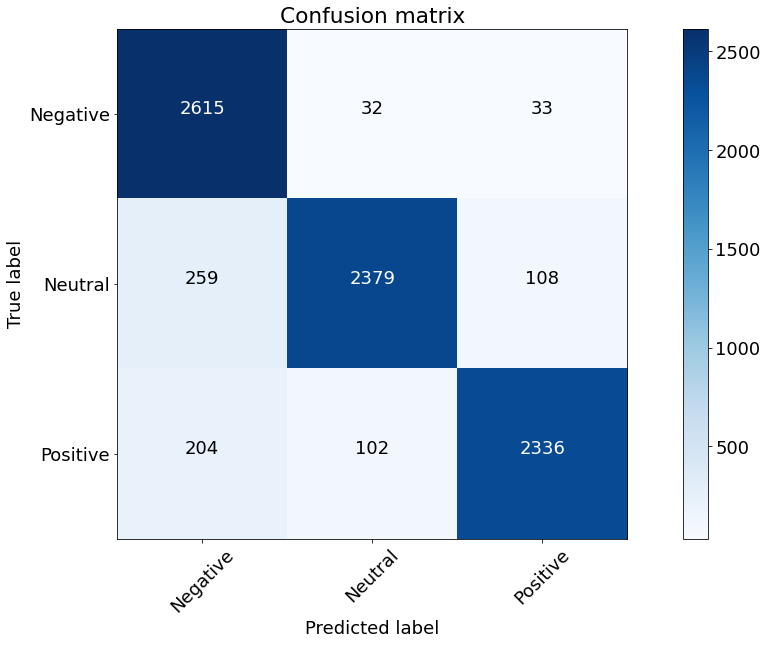

In [52]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [53]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2680
           1       0.95      0.87      0.90      2746
           2       0.94      0.88      0.91      2642

    accuracy                           0.91      8068
   macro avg       0.91      0.91      0.91      8068
weighted avg       0.91      0.91      0.91      8068



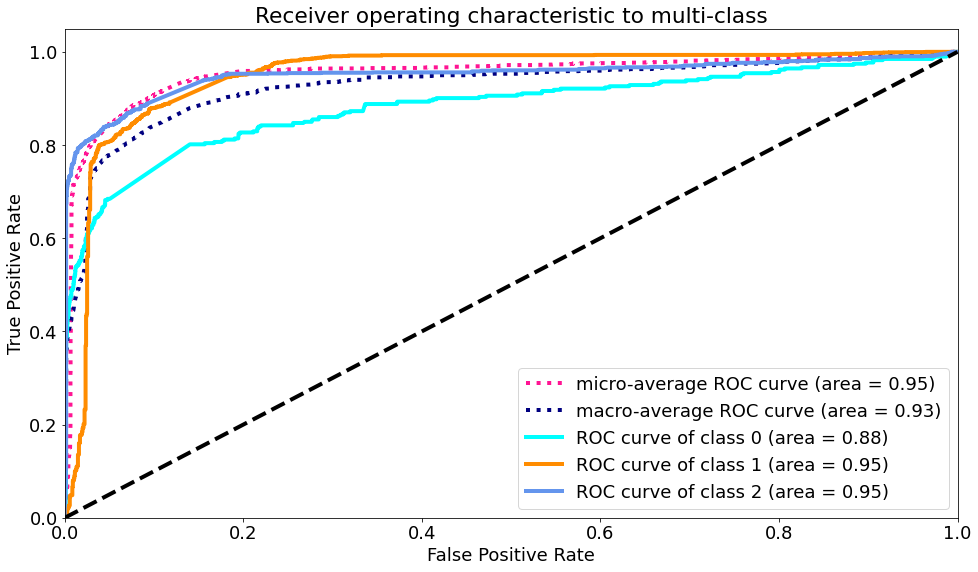

In [54]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'Rectangle' object has no property 'xtitle'

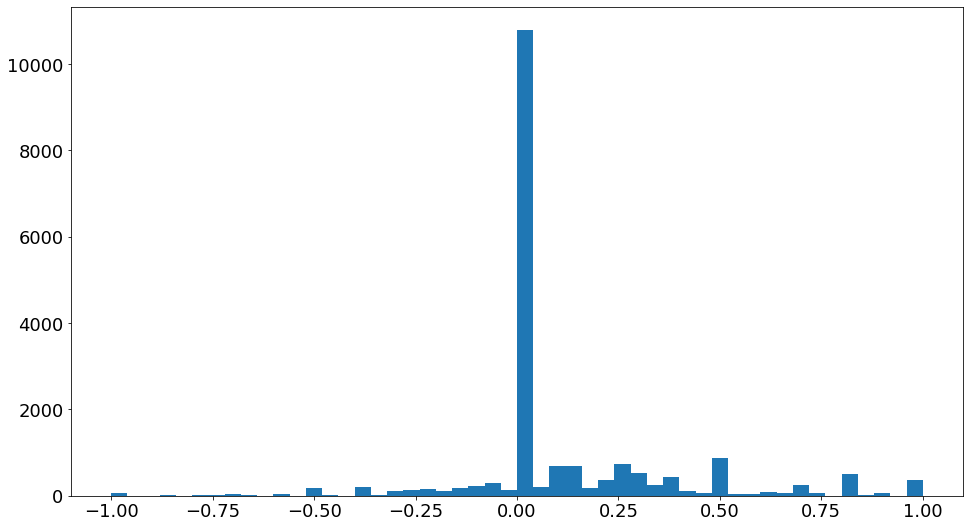

In [55]:
from plotly.offline import iplot
import plotly.offline 
process_reviews['polarity_C'].plot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')